# Iris Data Analysis Project

In [ ]:
First of all before analyzing the data we need to read the Readme file accompanying the Iris data set.
From this we can see that the Iris data is an Iris plants database created in July 1988 by R.A Fisher.

More importantly it tells us the data has 150 instances or rows of data about the Iris plants.
The attributes are 4 numeric, predictive attributes and the class.
The attribute information includes - 

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


In [17]:
from msilib.schema import Class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

## Tasks to carry out with Iris Data

1) Read in the Data
2) Check the data
3) data types
4) Clean the Data
5) check data
6) Questions we need to ask of the data
7) Univariate Anaylsis
8) Bivariate Analysis


The code below is for giving column names to each column od the data and read in the iris.data csv file and assign it to dataframe df

In [19]:
colnames=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
index=('Iris Setosa', 'Iris Versicolour', 'Iris Virginica')
df = pd.read_csv("iris.data",names=colnames)

We now check to see the column names 

In [25]:
print(df.columns)

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')


We check teh first 10 rows of data using the head() function

In [24]:
iris_describe = df.head(10)
print(iris_describe)

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   
5                 5.4                3.9                 1.7   
6                 4.6                3.4                 1.4   
7                 5.0                3.4                 1.5   
8                 4.4                2.9                 1.4   
9                 4.9                3.1                 1.5   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  
5                0.4  Iris-setosa  
6                0.3  Iris-setosa  
7      

There are 150 rows of data and 5 column names.

In [26]:
print(df.shape)

print(df["class"].value_counts())

(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## Clean the Iris Data

Here we need to clean the Iris data which means we need to remove any duplicate data or rows that are missing information

In [12]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

We run the same commands again

In [27]:
print(df.shape)

print(df["class"].value_counts())

(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## Univariate Analysis

We will get the summary data using the describe() function. 

In [28]:
summary_iris_all = df.describe()
print(summary_iris_all)

       sepal length in cm  sepal width in cm  petal length in cm  \
count          150.000000         150.000000          150.000000   
mean             5.843333           3.054000            3.758667   
std              0.828066           0.433594            1.764420   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.350000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal width in cm  
count         150.000000  
mean            1.198667  
std             0.763161  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  


In [ ]:
The above summary shows there are 147 rows of data as we have cleaned the data and removed any duplicates etc...
This summary data shows the mean, min, max etc... for all 3 classes.

From the summary data we can see that the mean for 'sepal length in cm' which includes all 3 classes is 5.85cm and the range 
is 3.6 cms. The standard deviation is 0.82 which is low and means   

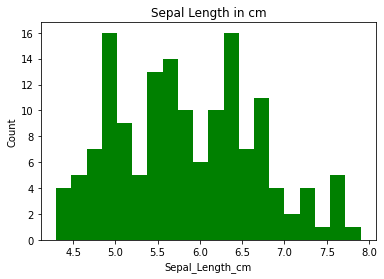

In [29]:
sepal_length = df["sepal length in cm"]
  
plt.hist(sepal_length, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")
plt.show()

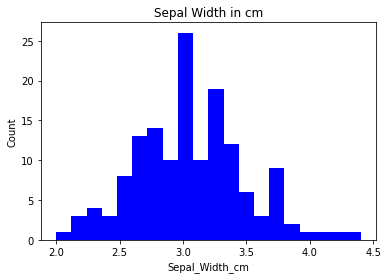

In [18]:
sepal_width = df["sepal width in cm"]
  
plt.hist(sepal_width, bins = 20, color = "blue")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

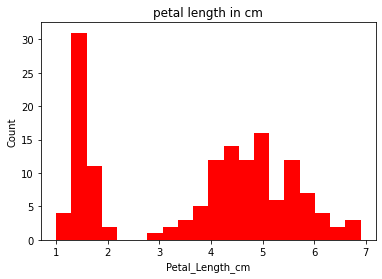

In [19]:
petal_length = df["petal length in cm"]
  
plt.hist(petal_length, bins = 20, color = "red")
plt.title("petal length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
plt.show()

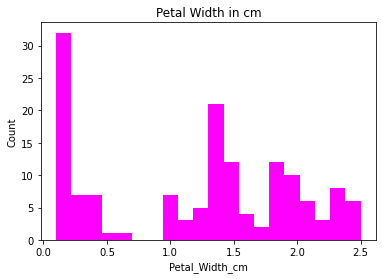

In [20]:
petal_width = df["petal width in cm"]
  
plt.hist(petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

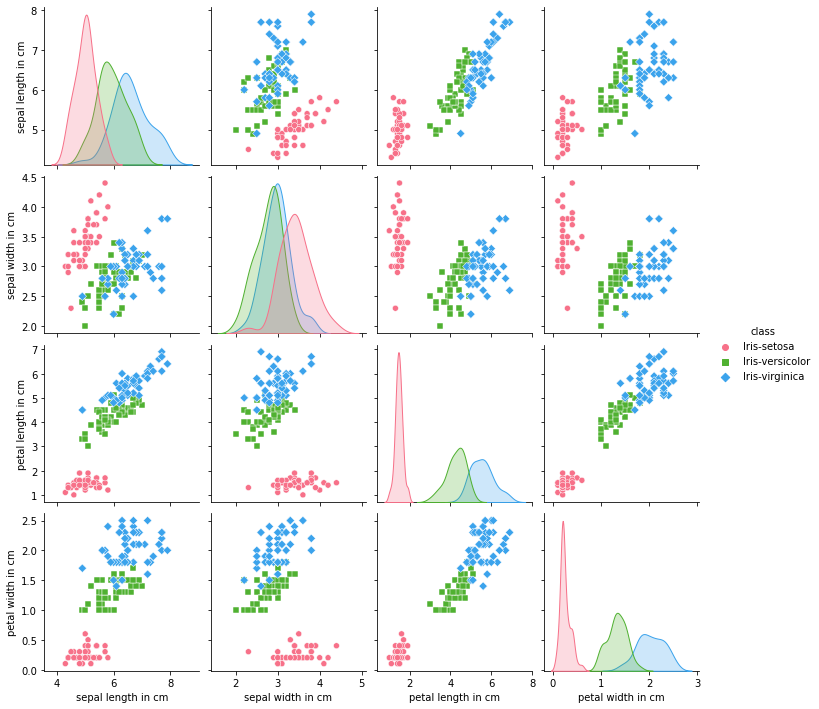

In [23]:
sns.pairplot(df,hue="class", palette="husl", markers=["o", "s", "D"])
plt.show()

In [32]:
iris_class = df.groupby('class')
setosa = iris_class.get_group('Iris-setosa')
print(setosa.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count            50.00000          50.000000           50.000000   
mean              5.00600           3.418000            1.464000   
std               0.35249           0.381024            0.173511   
min               4.30000           2.300000            1.000000   
25%               4.80000           3.125000            1.400000   
50%               5.00000           3.400000            1.500000   
75%               5.20000           3.675000            1.575000   
max               5.80000           4.400000            1.900000   

       petal width in cm  
count           50.00000  
mean             0.24400  
std              0.10721  
min              0.10000  
25%              0.20000  
50%              0.20000  
75%              0.30000  
max              0.60000  


In [34]:
versicolor = iris_class.get_group('Iris-versicolor')
print(versicolor.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           50.000000          50.000000           50.000000   
mean             5.936000           2.770000            4.260000   
std              0.516171           0.313798            0.469911   
min              4.900000           2.000000            3.000000   
25%              5.600000           2.525000            4.000000   
50%              5.900000           2.800000            4.350000   
75%              6.300000           3.000000            4.600000   
max              7.000000           3.400000            5.100000   

       petal width in cm  
count          50.000000  
mean            1.326000  
std             0.197753  
min             1.000000  
25%             1.200000  
50%             1.300000  
75%             1.500000  
max             1.800000  


In [35]:
virginica = iris_class.get_group('Iris-virginica')
print(virginica.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count            50.00000          50.000000           50.000000   
mean              6.58800           2.974000            5.552000   
std               0.63588           0.322497            0.551895   
min               4.90000           2.200000            4.500000   
25%               6.22500           2.800000            5.100000   
50%               6.50000           3.000000            5.550000   
75%               6.90000           3.175000            5.875000   
max               7.90000           3.800000            6.900000   

       petal width in cm  
count           50.00000  
mean             2.02600  
std              0.27465  
min              1.40000  
25%              1.80000  
50%              2.00000  
75%              2.30000  
max              2.50000  


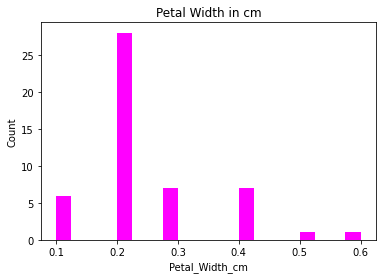

In [36]:
setosa_petal_width = setosa["petal width in cm"]
  
plt.hist(setosa_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

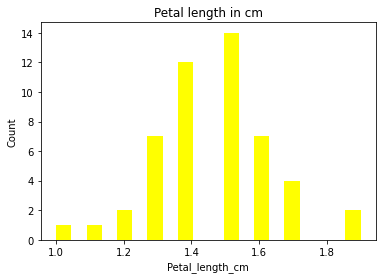

In [42]:
setosa_petal_length = setosa["petal length in cm"]
  
plt.hist(setosa_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

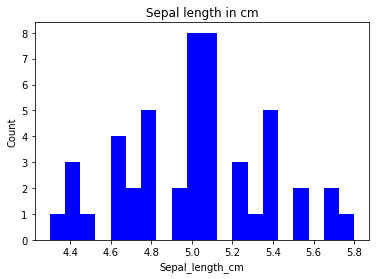

In [37]:
setosa_sepal_length = setosa["sepal length in cm"]
  
plt.hist(setosa_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

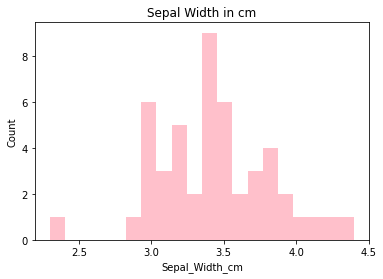

In [39]:
setosa_sepal_width = setosa["sepal width in cm"]
  
plt.hist(setosa_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

Versicolor

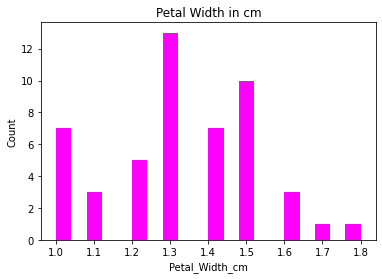

In [37]:
versicolor_petal_width = versicolor["petal width in cm"]
  
plt.hist(versicolor_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

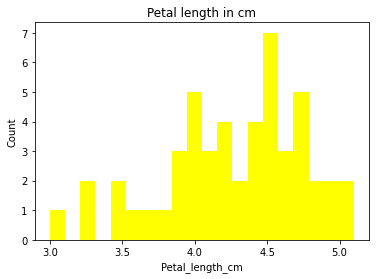

In [45]:
versicolor_petal_length = versicolor["petal length in cm"]
  
plt.hist(versicolor_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

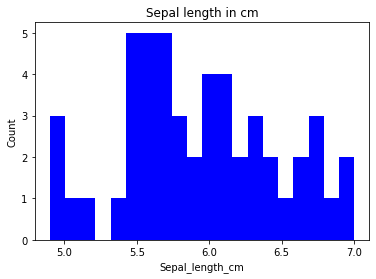

In [39]:
versicolor_sepal_length = versicolor["sepal length in cm"]
  
plt.hist(versicolor_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

In [14]:
versicolor_sepal_width = versicolor["sepal width in cm"]
  
plt.hist(versicolor_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

NameError: name 'versicolor' is not defined

In [15]:
virginica

NameError: name 'virginica' is not defined

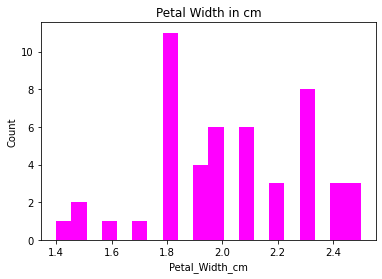

In [49]:
virginica_petal_width = virginica["petal width in cm"]
  
plt.hist(virginica_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

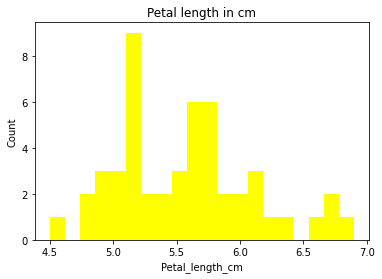

In [44]:
virginica_petal_length = virginica["petal length in cm"]
  
plt.hist(virginica_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

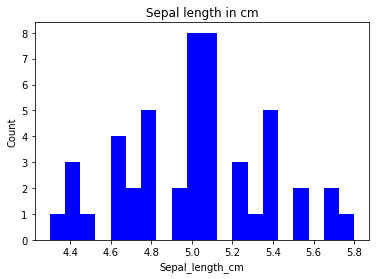

In [50]:
virginica_sepal_length = setosa["sepal length in cm"]
  
plt.hist(virginica_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

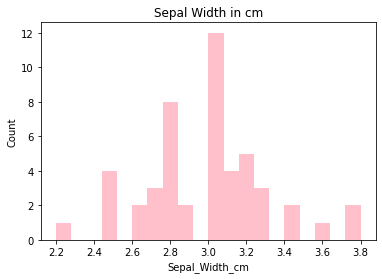

In [51]:
virginica_sepal_width = virginica["sepal width in cm"]
  
plt.hist(virginica_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

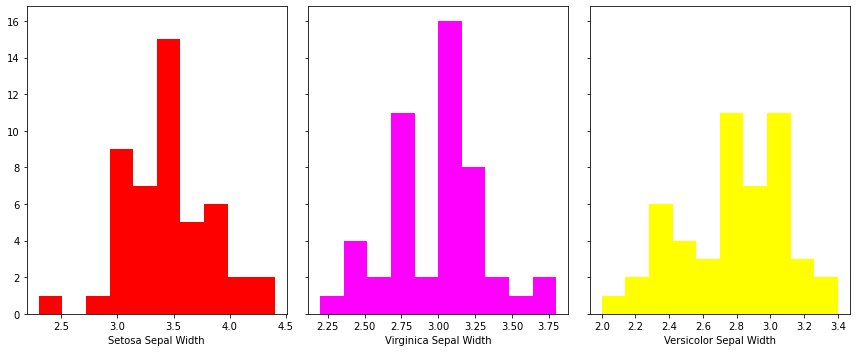

In [80]:
#plt.hist(virginica_sepal_width, bins = 20, color = "pink")
#plt.hist(setosa_sepal_width, bins = 20, color = "red")
#plt.hist(setosa_sepal_width, bins = 20, color = "blue")



fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_sepal_width, color = "red")
axs[0].set_xlabel("Setosa Sepal Width")
axs[1].hist(virginica_sepal_width, color = "magenta")
axs[1].set_xlabel("Virginica Sepal Width")
axs[2].hist(versicolor_sepal_width, color = "yellow")
axs[2].set_xlabel("Versicolor Sepal Width")

plt.show()

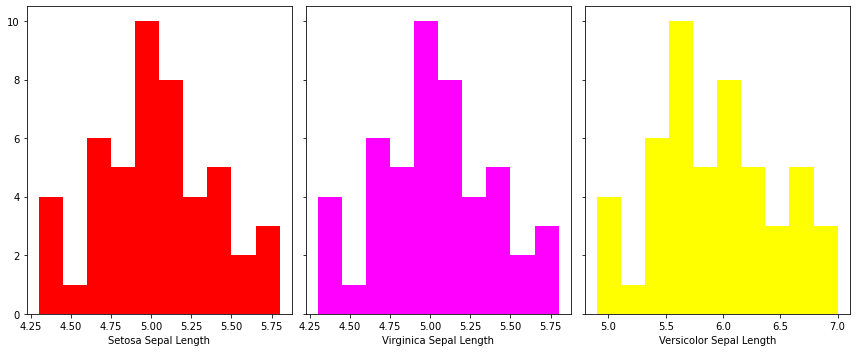

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_sepal_length, color = "red")
axs[0].set_xlabel("Setosa Sepal Length")
axs[1].hist(virginica_sepal_length, color = "magenta")
axs[1].set_xlabel("Virginica Sepal Length")
axs[2].hist(versicolor_sepal_length, color = "yellow")
axs[2].set_xlabel("Versicolor Sepal Length")

plt.show()

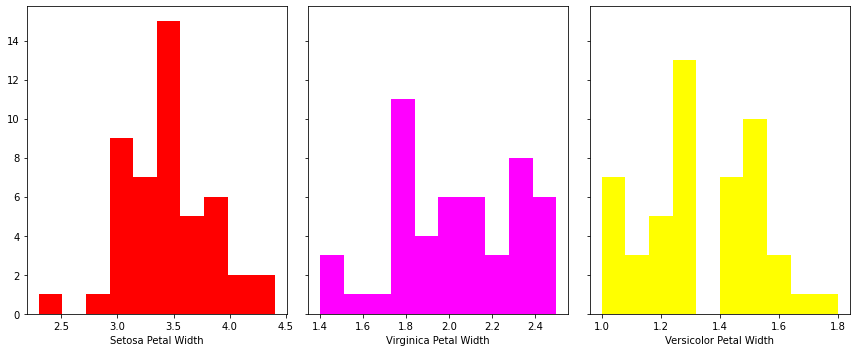

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_petal_width, color = "red")
axs[0].set_xlabel("Setosa Petal Width")
axs[1].hist(virginica_petal_width, color = "magenta")
axs[1].set_xlabel("Virginica Petal Width")
axs[2].hist(versicolor_petal_width, color = "yellow")
axs[2].set_xlabel("Versicolor Petal Width")

plt.show()

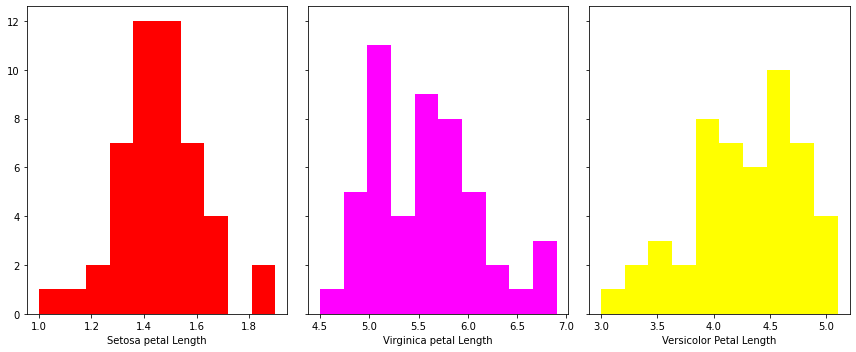

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_petal_length, color = "red")
axs[0].set_xlabel("Setosa petal Length")
axs[1].hist(virginica_petal_length, color = "magenta")
axs[1].set_xlabel("Virginica petal Length")
axs[2].hist(versicolor_petal_length, color = "yellow")
axs[2].set_xlabel("Versicolor Petal Length")

plt.show()

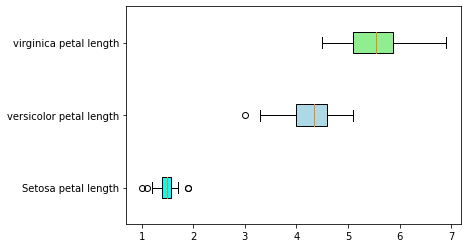

In [48]:
box_plot_data=[setosa_petal_length,versicolor_petal_length,virginica_petal_length]
#plt.boxplot(box_plot_data)

box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Setosa petal length','versicolor petal length','virginica petal length'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()